<a href="https://colab.research.google.com/github/yuuki08noah/Bigdata-Analysis/blob/master/%5B%EB%AC%B8%EC%A0%9C%ED%95%B4%EA%B2%B003%5D%ED%8C%90%EB%8B%A4%EC%8A%A4%EA%B8%B0%EC%B4%882(2206_%EB%B0%A9%EC%84%B8%EC%A4%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**자료형 변환**

In [43]:
import pandas as pd
# 데이터 준비
data = {
    "메뉴":['아메리카노', '카페라떼', '카페모카', '카푸치노', '에스프레소', '밀크티', '녹차'],
    "가격":[4500.0, 5000.0, 5500.0, 5000.0, 4000.0, 5900.0, 5300.0],
    "칼로리":['10', '110', '250', '110', '20', '210', '0'],
}
df = pd.DataFrame(data)
df.to_csv('cafe.csv', index=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   메뉴      7 non-null      object 
 1   가격      7 non-null      float64
 2   칼로리     7 non-null      object 
dtypes: float64(1), object(2)
memory usage: 300.0+ bytes


In [62]:
# 가격을 int로
dfint = df.astype({"가격": int})
# 칼로리를 float 로
df = df.astype({"칼로리": float})
dfint.info()
dffloat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   메뉴      7 non-null      object
 1   가격      7 non-null      int64 
 2   칼로리     7 non-null      object
dtypes: int64(1), object(2)
memory usage: 300.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   메뉴      7 non-null      object 
 1   가격      7 non-null      float64
 2   칼로리     7 non-null      float64
dtypes: float64(2), object(1)
memory usage: 300.0+ bytes


**새로운 컬럼 추가**

In [39]:
# 할인가 컬럼 추가
discount = 0.2

df['discount'] = df["가격"]*0.2
df['saleprice'] = df["가격"]-df["discount"]

print(df)

         메뉴      가격  칼로리 origin  discount  saleprice
0     아메리카노  4500.0   10   콜롬비아     900.0     3600.0
1      카페라떼  5000.0  110    NaN    1000.0     4000.0
2      카페모카  5500.0  250    NaN    1100.0     4400.0
3      카푸치노  5000.0  110    NaN    1000.0     4000.0
4     에스프레소  4000.0   20    NaN     800.0     3200.0
5       밀크티  5900.0  210    NaN    1180.0     4720.0
6        녹차  5300.0    0    NaN    1060.0     4240.0
시즌  크리스마스라떼  6000.0  300     한국    1200.0     4800.0
7      딴짓커피  2000.0   20    NaN     400.0     1600.0


**데이터 삭제(컬럼, 행)**

In [25]:
# 1행 삭제
dfremoved = df.copy()
dfremoved = dfremoved.drop(1, axis=0)
# 칼로리 삭제
dfremoved = dfremoved.drop('칼로리', axis=1)
dfremoved

,메뉴,가격
0,아메리카노,4500.0
2,카페모카,5500.0
3,카푸치노,5000.0
4,에스프레소,4000.0
5,밀크티,5900.0
6,녹차,5300.0


**데이터 추가 변경**

In [41]:
# 결측값으로 추가, 원산지 컬럼을 만들고 결측값(NaN)으로 대입
import numpy as np
df['origin'] = np.nan

# 아메리카노의 원두는 '콜롬비아' 데이터 추가
df.loc[0, 'origin'] = '콜롬비아'

df
# 리스트 형태로 데이터(행) 추가 : 인덱스는 '시즌', 데이터는 ['크리스마스라떼', 6000, 300, '한국']
df.loc['시즌'] = ['크리스마스라떼', 6000, 300, '한국', 1200, 4800]

df
# 딕셔너리 형태로 데이터(행) 추가 : loc 사용, 데이터는 '메뉴':'딴짓커피', '가격':2000, '칼로리':20
df.loc[7] = {'메뉴':'딴짓커피', '가격':2000, 'discount': 400, 'saleprice': 1600, '칼로리':20}

df

<ipython-input-41-ebfc0d8ae9dc>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '콜롬비아' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[0, 'origin'] = '콜롬비아'


,메뉴,가격,칼로리,origin,discount,saleprice
0,아메리카노,4500.0,10,콜롬비아,900.0,3600.0
1,카페라떼,5000.0,110,NaN,1000.0,4000.0
2,카페모카,5500.0,250,NaN,1100.0,4400.0
3,카푸치노,5000.0,110,NaN,1000.0,4000.0
4,에스프레소,4000.0,20,NaN,800.0,3200.0
5,밀크티,5900.0,210,NaN,1180.0,4720.0
6,녹차,5300.0,0,NaN,1060.0,4240.0
시즌,크리스마스라떼,6000.0,300,한국,1200.0,4800
7,딴짓커피,2000.0,20,NaN,400.0,1600


**정렬**

In [54]:
# 인덱스 기준 (기본값 ascending=True) 정렬
df.sort_index(ascending=False)

# 메뉴 기준 정렬
df.sort_values(by=['가격'])

# 가격과 메뉴 기준 정렬
df.sort_values(by=['가격', '칼로리'], ascending=False)

# 인덱스 새로 만들기 drop=True
df.reset_index(drop=True)


,메뉴,가격,칼로리
0,아메리카노,4500.0,10
1,카페라떼,5000.0,110
2,카페모카,5500.0,250
3,카푸치노,5000.0,110
4,에스프레소,4000.0,20
5,밀크티,5900.0,210
6,녹차,5300.0,0


**필터링**

In [94]:
# 칼로리가 50 미만 데이터
condition = df['칼로리'] < 200
df[condition]
# 칼로리가 50 이상 데이터 ( 조건문에  ~  붙이는 방법 )
condition = df['칼로리'] >= 50
df[condition]
# 가격이 5000 이상이고 칼로리가 100 초과인 데이터
condition = (df['가격'] >= 5000) & (df['칼로리'] > 100)
df[condition]

# 메뉴에 '녹차' 가 있는 경우
condition = df['메뉴'].isin(['녹차'])
df[condition]

# 메뉴에 '녹차' '카푸치노' '카페라떼' 가 있는 경우
condition = df['메뉴'].isin(['녹차', '카푸치노', '카페라떼'])
df[condition]


,메뉴,가격,칼로리
1,카페라떼,5000.0,110.0
3,카푸치노,5000.0,110.0
6,녹차,5300.0,0.0


**프로젝트 - 조건에 맞는 데이터 추출 & 데이터 프레임에 함수 적용( apply )**

In [116]:
import pandas as pd

df = pd.DataFrame({'a' : [i for i in range(1, 11)], 'b' : [i for i in range(11, 21)], 'c' : [i for i in range(21, 31)]})
df
# a, c 열 출력
df[['a', 'c']]
# a 가 3 이상인 데이터 출력
df[df['a'] >= 3]
# c 가 최댓값인 데이터 출력
df.loc[df['c'] == max(df['c'])]
# a 가 3 이상인 데이터 중 a, c 열만 출력
df[df['a'] >= 3][['a', 'c']]
# a 가 3 이상이고, b 가 16 미만인 데이터 출력
df[(df['a'] >= 3) & (df['b'] < 16)]
# a, b, c를 합한 total 컬럼을 추가하라.
df['total'] = df.a + df.b + df.c
df['total']
# total 이 50 이상이면 'A',  50미만 40이상이면 'B', 40미만이면 'C' 등급을 지정하는 'grade' 컬럼을 추가하라. ( 중첩 조건문 np.where 이용 )
df['grade'] = np.where(df['total'] >= 50, 'A', np.where(df['total'] >= 40, 'B', 'C'))
df['grade']
#  위 문제를  사용자 정의 함수를 만들어  apply 를 적용하는 코드로 변경하라.
def f(x):
  if x >= 50: return 'A'
  elif x >= 40: return 'B'
  else: return 'C'

df['grade2'] = df['total'].apply(f)
df['grade2']


# grade를 오름차순으로 정렬하라. ( sort_values )
df.sort_values('grade')




,a,b,c,total,grade,grade2
6,7,17,27,51,A,A
7,8,18,28,54,A,A
8,9,19,29,57,A,A
9,10,20,30,60,A,A
3,4,14,24,42,B,B
4,5,15,25,45,B,B
5,6,16,26,48,B,B
0,1,11,21,33,C,C
1,2,12,22,36,C,C
2,3,13,23,39,C,C


**프로젝트 - 달걀의 가격 변화 알아보기**

In [ ]:
from google.colab import files
uploaded = files.upload()


# 데이터 시각화

import matplotlib.pyplot as plt
plt.title('price')
plt.plot( data['시점'], data['달걀'], 'b.', label='egg')
plt.legend()
plt.show()


import matplotlib.pyplot as plt
plt.title('egg price')
import seaborn as sns
sns.scatterplot(x='시점', y='달걀', data = data )
plt.legend(labels=['egg'], title='price')

In [122]:
from google.colab import files
uploaded = files.upload()

Saving Consumer Price Index by Item 2020-100 (1).csv to Consumer Price Index by Item 2020-100 (1).csv


6           NaN
7     10.476879
8    -18.443427
9      9.182037
10    14.910026
11    33.128795
12    20.683695
13    16.084500
14     7.039309
15     4.732174
16     0.501360
17     0.249430
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     9.184695
23     4.968875
24    14.478979
25    12.101940
26     6.632422
27    12.279208
28     4.714315
29     5.454815
30     3.170690
31     4.222689
32     5.835063
33     6.521143
34     2.794511
35     8.072979
36    -0.990661
37     1.083662
38     9.514107
39     1.534965
40     0.000000
41     0.000000
42     0.241548
43     2.652707
44     0.000000
45     0.000000
46     4.149424
47     0.000000
48    -1.658344
49    -1.212127
50     0.000000
51     0.000000
52     0.000000
53     0.000000
54     0.000000
55     0.000000
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
Name: rate, dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


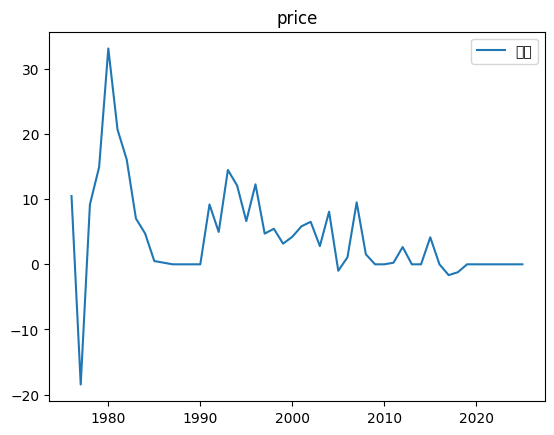

In [149]:
import pandas as pd
data = pd.read_csv("data.csv")
data = data.sort_values(['시점'])
data.reset_index(drop=True)

data['rate'] = (((data['열차료']-data['열차료'].shift(1))/data['열차료'].shift(1))*100)
print(data['rate'])
import matplotlib.pyplot as plt
plt.title('price')
plt.plot( data['시점'], data['rate'], '-', label='전국')
plt.legend()
plt.show()



**프로젝트 - 소비자 물가 지수**
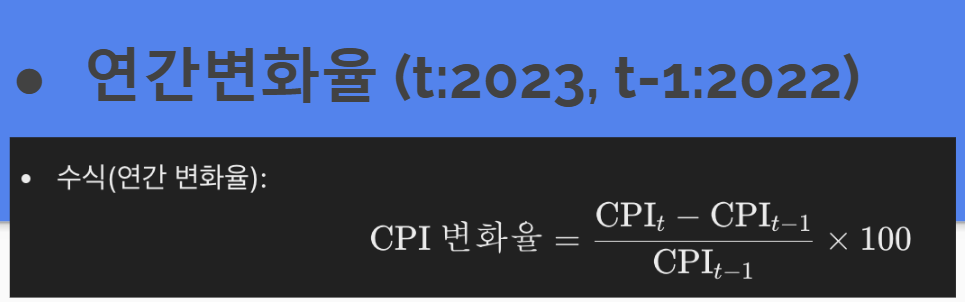

In [ ]:
# 품목별 소비자 물가 지수를 구해서 다른 품목과 비교하는 그래프 그리기( line graph )